# 6장 자전거 대여 수요 예측 경진대회 환경 세팅된 노트북 양식

In [50]:
import pandas as pd
import numpy as np

data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [51]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [52]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


train과 test의 컬럼 수를 맞춰줘야됨 : 따라서 train의 casual과 registered는 빼고 학습을 진행합니다.

In [53]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


datetime 피처는 주로 일,월,시간,분,초 와 같은 데이터를 추출한 뒤 파생변수로 제작합니다. dateime 피처는 제거합니다.

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 분석을 위한 피처 엔지니어링

In [56]:
print(train['datetime'][100])
print(train['datetime'][100].split())
print(train['datetime'][100].split()[0])  #날짜
print(train['datetime'][100].split()[1])  #시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [57]:
print(train['datetime'][100].split()[0].split("-")[0]) #년
print(train['datetime'][100].split()[0].split("-")[1]) #월
print(train['datetime'][100].split()[0].split("-")[2]) #일

2011
01
05


In [58]:
print(train['datetime'][100].split()[1].split(":")[0]) #시
print(train['datetime'][100].split()[1].split(":")[1]) #분
print(train['datetime'][100].split()[1].split(":")[2]) #초

09
00
00


In [59]:
train["date"] = train["datetime"].apply(lambda x: x.split()[0])

train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [60]:
from datetime import datetime
import calendar

print(train["date"][100])
print(datetime.strptime(train['date'][100], "%Y-%m-%d")) # datetime 형식으로 변경
print(datetime.strptime(train['date'][100], "%Y-%m-%d",).weekday()) # 정수로 요일 반환
print(calendar.day_name[datetime.strptime(train["date"][100], "%Y-%m-%d").weekday()]) # 문자열로 요일 반환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [61]:
train["weekday"] = train["date"].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()]) # 문자열로 요일 반환

In [62]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday


In [63]:
train["season"] = train["season"].map({1: "Spring",
                                      2 : "Summer",
                                      3 : "Fall",
                                      4 : "Winter"})

train["weather"] = train["weather"].map({1: "Clear",
                                        2: "Mist, Few clouds",
                                        3: "Light Snow, Rain, Thounderstorm",
                                        4: "Heavy Rain, Thunderstorm, Snow, Fog"})

In [64]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 데이터 시각화

In [65]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

** 시작하기 전에 target값의 분포를 아는 것이 중요하다.**

- 따라서 분포를 보고 이를 변환할지 고려하여 먼저 전처리를 진행해줌

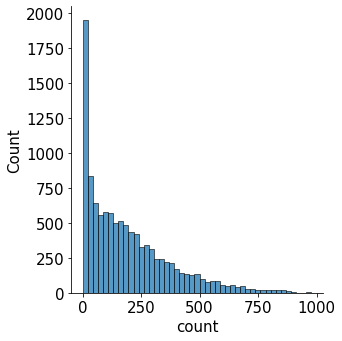

In [66]:
mpl.rc('font', size=15) # matplotlib 폰트 크기 15로 설정

sns.displot(train["count"]);

- 데이터가 좌편향된 것을 볼 수 있습니다.
- 회귀모델이 좋은 성능을 내기 위해선 데이터가 정규분포를 따라야 하기 때문에, Log_Transform을 통해 정규분포에 가깝게 만들어줍니다.



#### 정리하자면, 그냥 count는 left-skewed 되어 있기 때문에, 이를 정규분포에 가깝도록 Log변환하여 최종적으로 우리 모델의 target은 log(count)가 되는 것이다.
- **이에 대해 count의 정확한 수치를 이해하거나, kaggle에 제출하기 위해선 마지막에 다시 지수변환을 통해 기존의 값으로 바꿔준 뒤 제출해야됨을 명시하자**

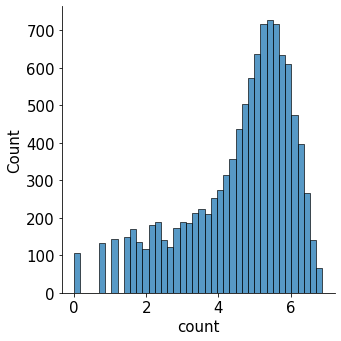

In [67]:
sns.displot(np.log(train['count']))

#### 다중 plot 그리기

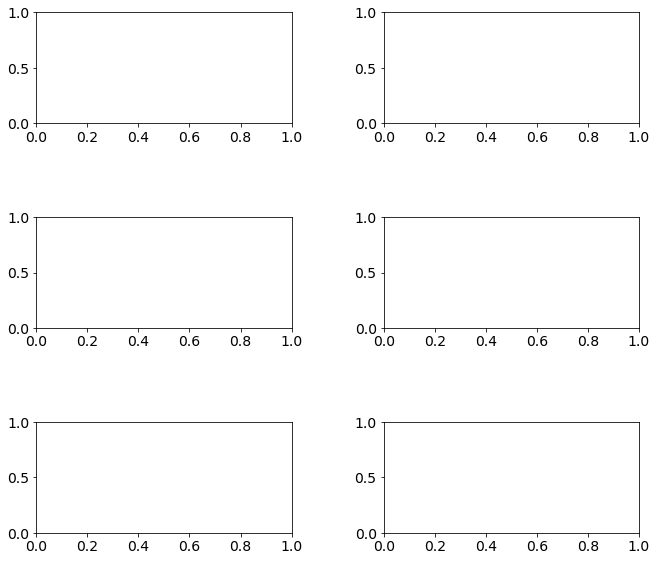

In [68]:
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보 ( 없으면 그래프 끼리 뺵뺵히 붙어있게됨)
figure.set_size_inches(10, 9) # 전체 figure size 설정

In [69]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

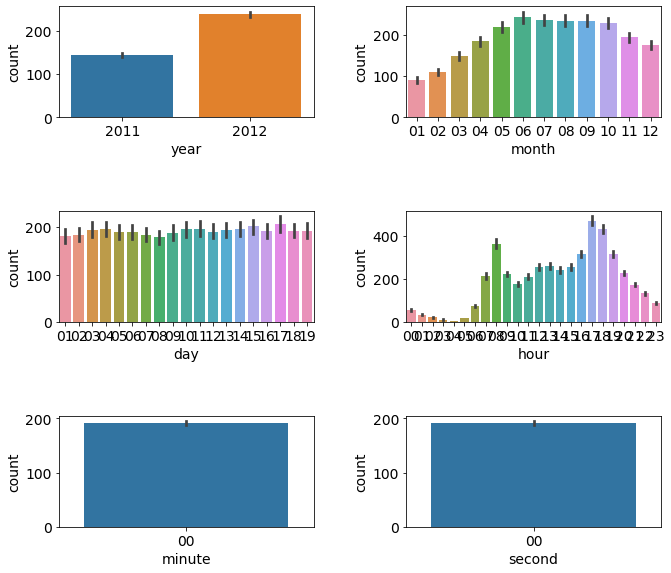

In [70]:
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보 ( 없으면 그래프 끼리 뺵뺵히 붙어있게됨)
figure.set_size_inches(10, 9) # 전체 figure size 설정

sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1]);

- 그래프를 시각화 하니, x축이 지저분하고 조금 아쉬운 모습을 보임
- 따라서, 시각화를 겹치지 않게 해주고 제목을 추가해줍니다.

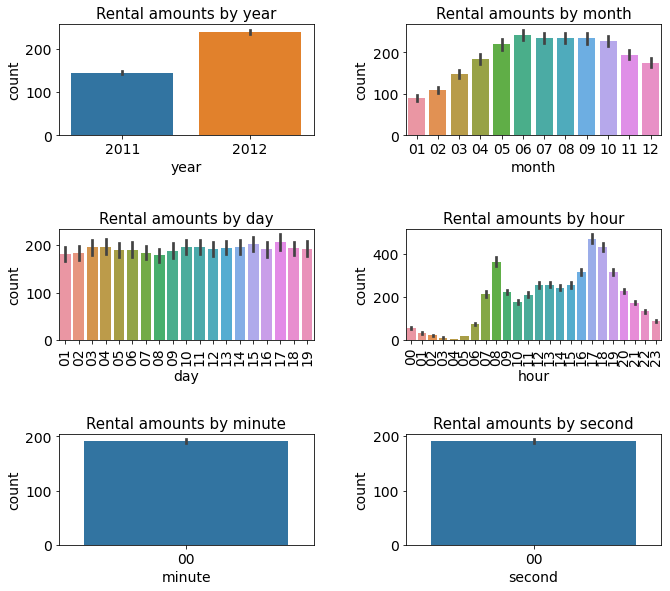

In [71]:
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보 ( 없으면 그래프 끼리 뺵뺵히 붙어있게됨)
figure.set_size_inches(10, 9) # 전체 figure size 설정

sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1]);

axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

### 그래프에 대한 해석
- Day feature의 경우 일별로 크게 차이가 없다. **따라서 큰 차이를 보이지 않는 day 컬럼을 삭제한다.**
- 분, 초별 데이터 컬럼도 아무런 의미를 지니지 않고 있다. **따라서 의미를 갖고 있지 않는 minute, second 컬럼을 삭제한다.**

- **아무런 정보도 담고 있지 않은 피처는 모델 훈련에 사용하지 않습니다.**

### Box Plot 그리기

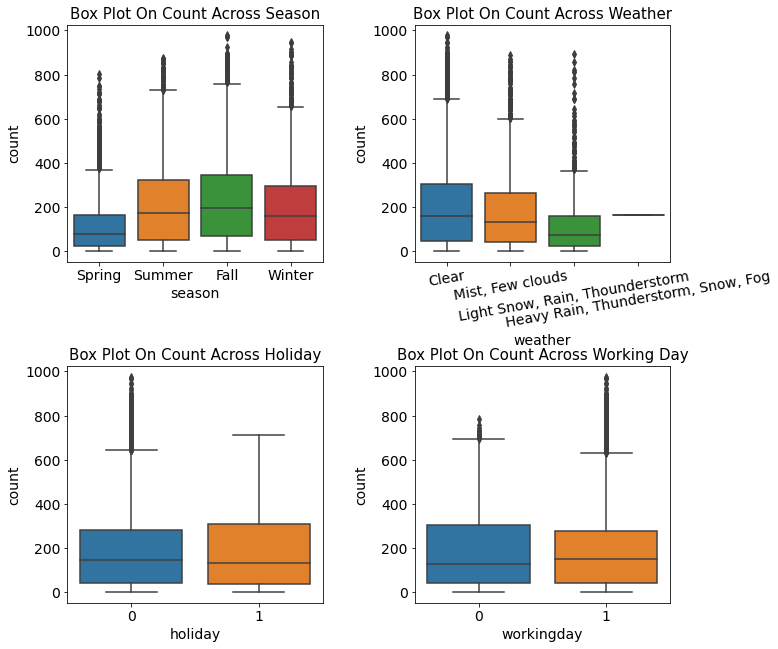

In [72]:
# step 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

# step 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# step 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2: x축 라벨 겹침 해결
axes[0, 1].tick_params(axis='x', labelrotation=10) # x축 10도 회전

### point plot 그리기

<AxesSubplot:xlabel='hour', ylabel='count'>

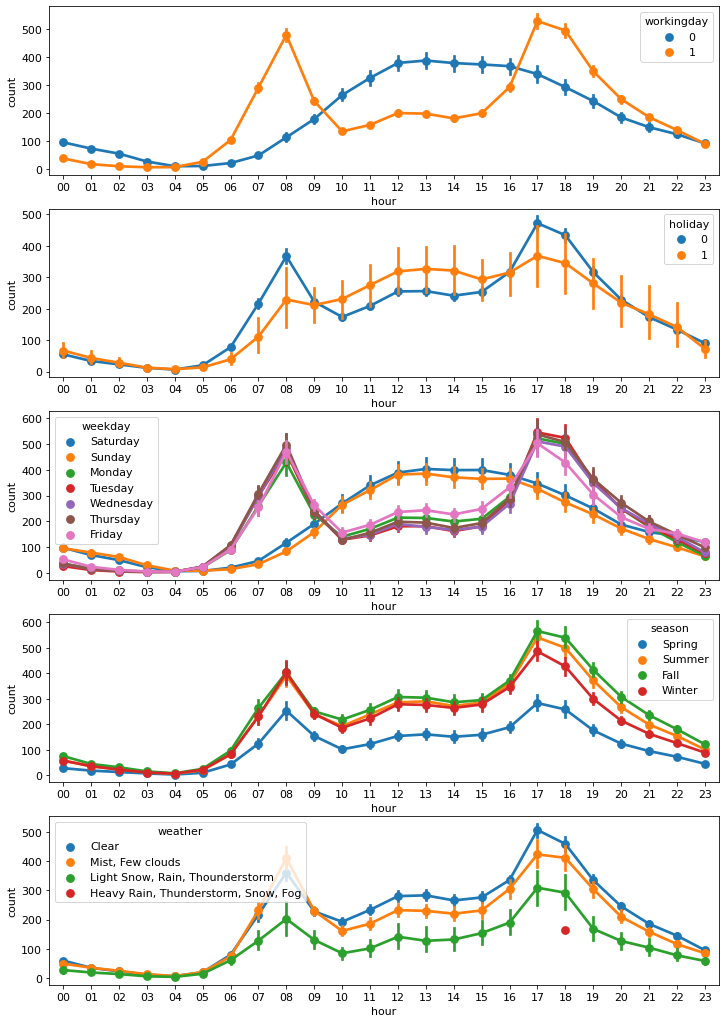

In [73]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax = axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax = axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax = axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax = axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax = axes[4])

### Scatter Plot with regLine

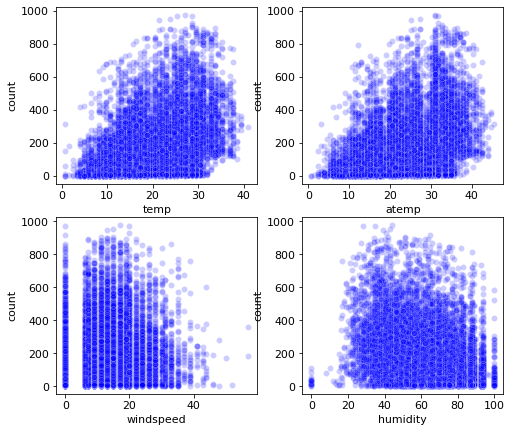

In [74]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
plt.tight_layout()

# 각 서브플롯에 시각화
sns.scatterplot(x='temp', y='count', data=train, ax=axes[0, 0], alpha=0.2, color='blue')
sns.scatterplot(x='atemp', y='count', data=train, ax=axes[0, 1], alpha=0.2, color='blue')
sns.scatterplot(x='windspeed', y='count', data=train, ax=axes[1, 0], alpha=0.2, color='blue')
sns.scatterplot(x='humidity', y='count', data=train, ax=axes[1, 1], alpha=0.2, color='blue');

- windspeed의 경우, 풍속이 0으로 측정된 경우가 많습니다.
- 이렇게 0으로 측정된 경우, 결측치라고 판단할 수 있다.

**결측치가 많은 데이터는 featrue를 제거하거나, 결측치를 다른 값으로 대체하는 방식을 사용합니다. 여기서는 feature 자체를 제거합니다.**

### HeatMap

In [75]:
train[["temp", "atemp", "humidity", "windspeed", "count"]].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


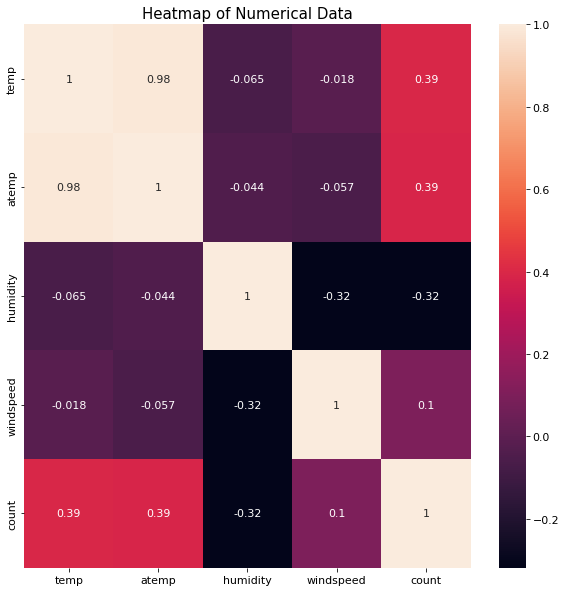

In [76]:
corrMat = train[["temp", "atemp", "humidity", "windspeed", "count"]].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title="Heatmap of Numerical Data");

#### 상관관계 그릴 떄 중요한 점
- target 변수인 count와 상관관계가 중요함
- target과 상관관계가 낮은 column은 예측에 큰 도움을 주지 못함
- **따라서 위 heatmap에서는 windspeed를 제거한다.**

## 베이스라인 모델
1. 데이터 불러오기
2. (기본적인) 피처 엔지니어링
3. 평가지표 계산함수 작성
4. 모델 훈련
5. 성능 검증
6. 제출

In [77]:
import pandas as pd
import numpy as np

data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

### 피쳐 엔지니어링

#### 이상치 제거

In [78]:
train = train[train['weather'] != 4]

all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


- row 개수는 17379개인데, 마지막 인덱스 번호는 6492이다.
- 이는 train과 test를 concat하는 과정에서 index가 1-10886 다시 1-6493번으로 돌았기에 발생한 문제로 보인다.
- **ignore_index = True**를 통해 이를 해결할 수 있다.

In [79]:
all_data = pd.concat([train, test], ignore_index = True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


#### 파생변수 추가

In [80]:
all_data['datetime'] = pd.to_datetime(all_data['datetime'])

all_data["year"] = all_data["datetime"].dt.year
all_data["month"] = all_data["datetime"].dt.month
all_data["hour"] = all_data["datetime"].dt.hour
all_data["weekday"] = all_data["datetime"].dt.weekday # 요일

#### 필요없는 피처 제거

In [81]:
drop_features = ["casual", "registered", "datetime", "month", "windspeed"]

all_data.drop(drop_features, axis = 1, inplace = True)

#### 데이터 나누기

In [82]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

X_train = X_train.drop(['count'], axis = 1)
X_test = X_test.drop(['count'], axis = 1)

y = train["count"]

In [83]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


### 평가지표 계산 함수 작성

In [84]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수 변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    
    # 로그 변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

### 모델 훈련

In [85]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [86]:
log_y = np.log(y) # target log 변환
linear_reg_model.fit(X_train, log_y)

LinearRegression()

### 모델 성능 검증

In [87]:
preds = linear_reg_model.predict(X_train)

In [88]:
print(f"선형 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}")

선형 회귀 RMSLE 값 : 1.0205


### 예측 및 결과 제출

In [89]:
linearreg_preds = linear_reg_model.predict(X_test)

submission['count'] = np.exp(linearreg_preds)
submission.to_csv("submission.csv", index=False)

## 성능개선 1 : Rigde Regression

- GridSearchCV : 하이퍼파라미터 튜닝

In [90]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [91]:
ridge_params = {'max_iter' : [3000],
               'alpha' : [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

In [92]:
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                                     param_grid=ridge_params,
                                     scoring=rmsle_scorer,
                                     cv=5)

In [93]:
log_y = np.log(y)
gridsearch_ridge_model.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [94]:
print("최적 하이퍼파라미터 :", gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


In [95]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

print(f"릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}")

릿지 회귀 RMSLE 값 : 1.0205


## 성능 개선 : XGBoostRegressor

In [96]:
from xgboost import XGBRegressor

In [98]:
model = XGBRegressor()

# param_grid = {
#     'learning_rate': [0.05, 0.1, 0.2],  # 학습률
#     'n_estimators': [100, 200, 300],  # 트리의 개수
#     'max_depth': [3, 5, 7],  # 트리의 최대 깊이
#     'min_child_weight': [1, 3, 5],  # 자식 노드의 최소 가중치 합
#     'subsample': [0.6, 0.8, 1.0],  # 샘플링 비율
#     'colsample_bytree': [0.6, 0.8, 1.0],  # 열 샘플링 비율
#     'gamma': [0, 0.1, 0.3],  # 트리 노드 분할을 위한 최소 손실 감소
#     'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
#     'reg_lambda': [0, 0.1, 0.5]  # L2 regularization
# }

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'max_depth': [3, 5, 7],  # 트리의 최대 깊이
}

grid_cv = GridSearchCV(estimator = model,
                      param_grid = param_grid,
                      scoring=rmsle_scorer,
                      cv=5)

log_y = np.log(y)
grid_cv.fit(X_train, log_y)

print("최적 하이퍼파라미터 :", grid_cv.best_params_)

최적 하이퍼파라미터 : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [99]:
preds = grid_cv.best_estimator_.predict(X_train)

print(f"XGBoost 회귀 RMSLE 값 : {rmsle(log_y, preds)}")

랜덤 포레스트 회귀 RMSLE 값 : 0.2916926575155587


## 예측 및 결과 제출

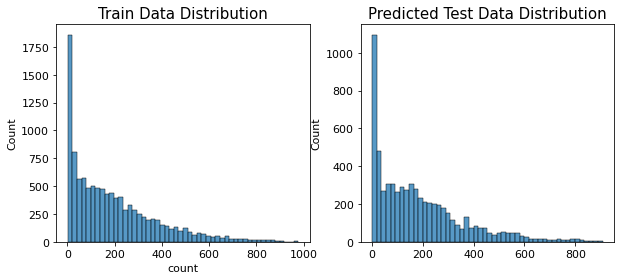

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

xgboost_preds = grid_cv.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')

sns.histplot(np.exp(xgboost_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [102]:
submission['count'] = np.exp(xgboost_preds) # 지수변환해서 넣어줍니다.
submission.to_csv('submission.csv', index=False)